In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter

In [173]:
import matplotlib
print("Matplotlib verson:", matplotlib.__version__)

Matplotlib verson: 3.8.4


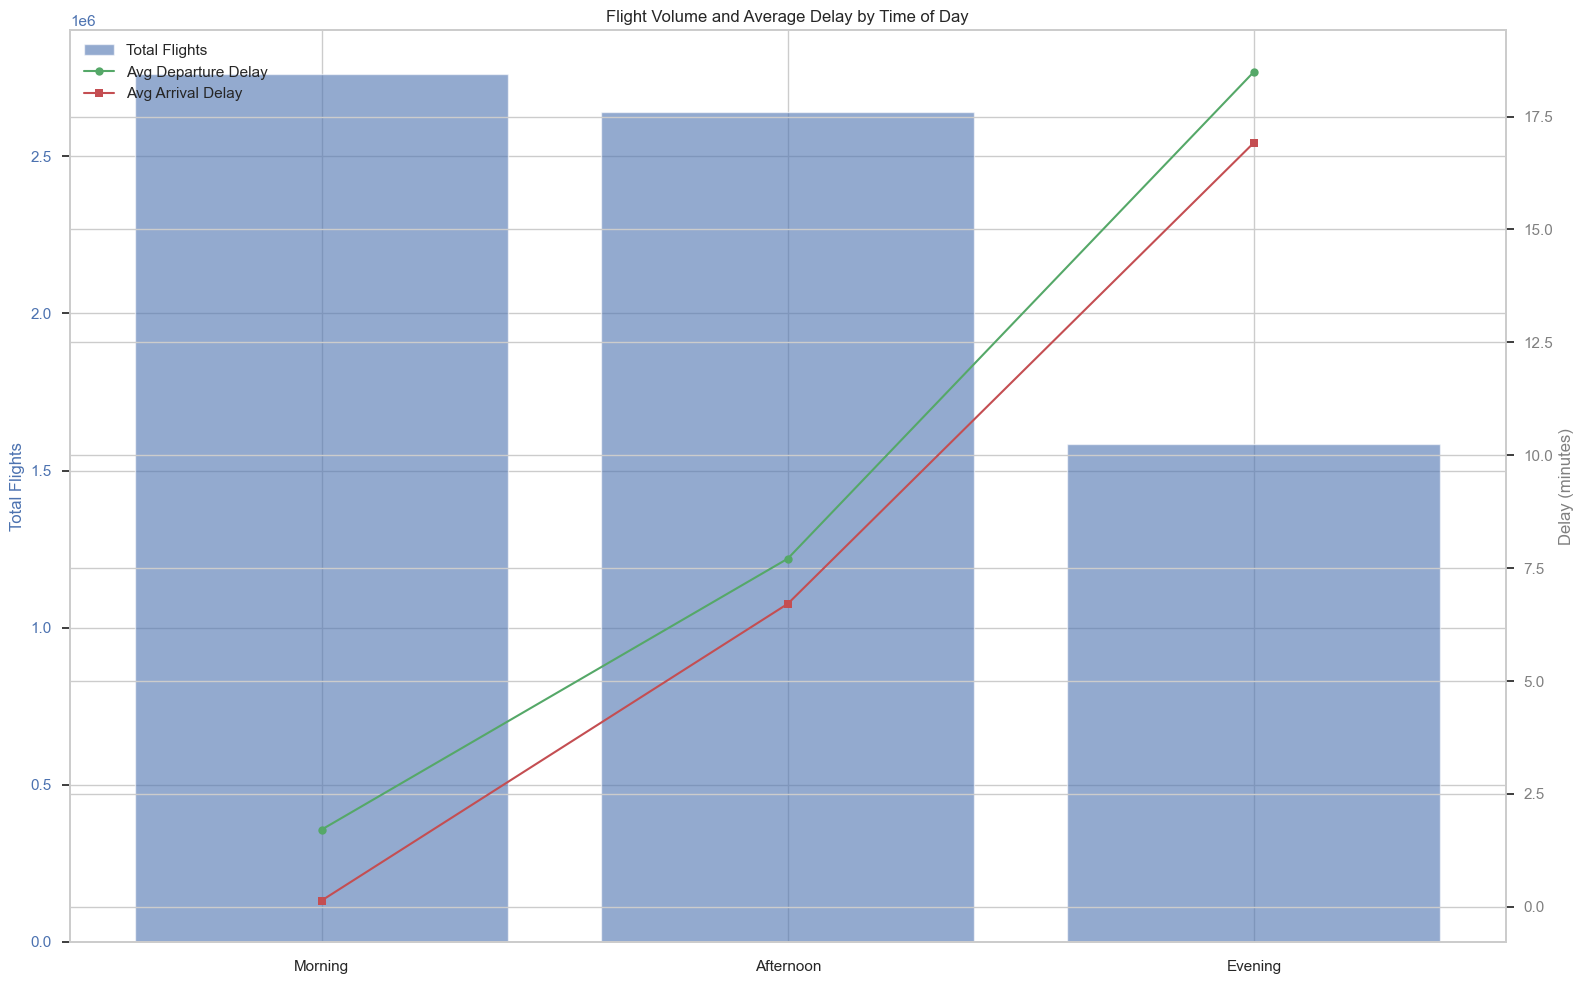

In [139]:
#Total number of flights in different time periods
# load data
df= pd.read_csv('按时间段分析平均延误.csv')

# Set the size and style of the chart
plt.figure(figsize=(16, 10))
colors = ['#4C72B0', '#55A868', '#C44E52']

# Create Main Axis (Total Number of Flights)
ax1 = plt.gca()
ax1.bar(df['timeofday'], df['totalflights'], color=colors[0], alpha=0.6, label='Total Flights')
ax1.set_ylabel('Total Flights', color=colors[0])
ax1.tick_params(axis='y', labelcolor=colors[0])

#Create a secondary axis (average delay)
ax2 = ax1.twinx()
ax2.plot(df['timeofday'], df['avgdepdelay'], color=colors[1], marker='o', label='Avg Departure Delay')
ax2.plot(df['timeofday'], df['avgarrdelay'], color=colors[2], marker='s', label='Avg Arrival Delay')
ax2.set_ylabel('Delay (minutes)', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

#  set Title and Legend
plt.title('Flight Volume and Average Delay by Time of Day')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.savefig("Flight Volume and Average Delay by Time of Day.png")
plt.show()

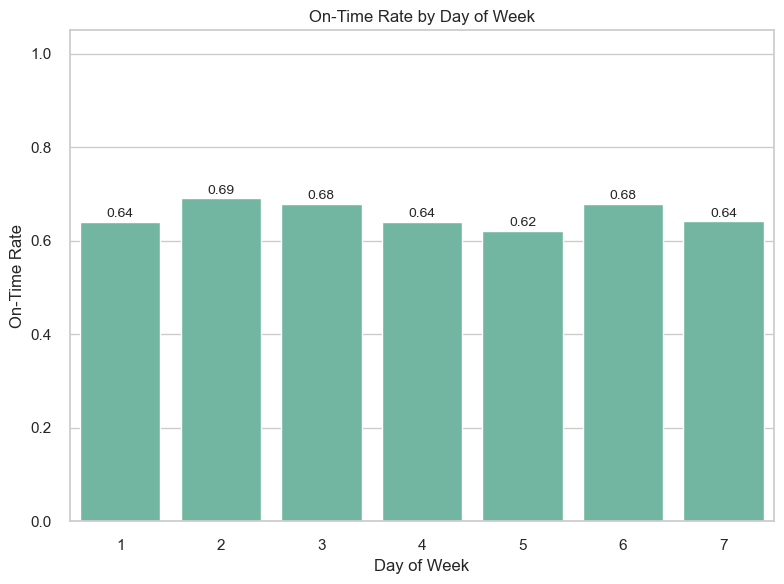

In [179]:
# load data
df_week = pd.read_csv('按星期分析准点率.csv')

# 将星期转换为有序分类类型（确保顺序正确）
week_order = [1, 2, 3, 4, 5, 6, 7]  # 假设1=周一，7=周日
df_week['dayofweek'] = pd.Categorical(
    df_week['dayofweek'],
    categories=week_order,
    ordered=True
)

# set style
sns.set(style='whitegrid')

# draw（不再按准点率排序，而是按星期的自然顺序）
plt.figure(figsize=(8, 6))
barplot = sns.barplot(
    data=df_week.sort_values('dayofweek'),  # 按星期的自然顺序排序
    x='dayofweek',
    y='ontimerate',
    color='#66c2a5'
)

# add label（确保标签按星期顺序添加）
for i, row in enumerate(df_week.sort_values('dayofweek').itertuples()):
    plt.text(i, row.ontimerate + 0.01, f"{row.ontimerate:.2f}", ha='center', fontsize=10)

plt.title('On-Time Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('On-Time Rate')
plt.ylim(0, 1.05)  

plt.tight_layout()
plt.savefig("On-Time Rate by Day of Week.png")
plt.show()

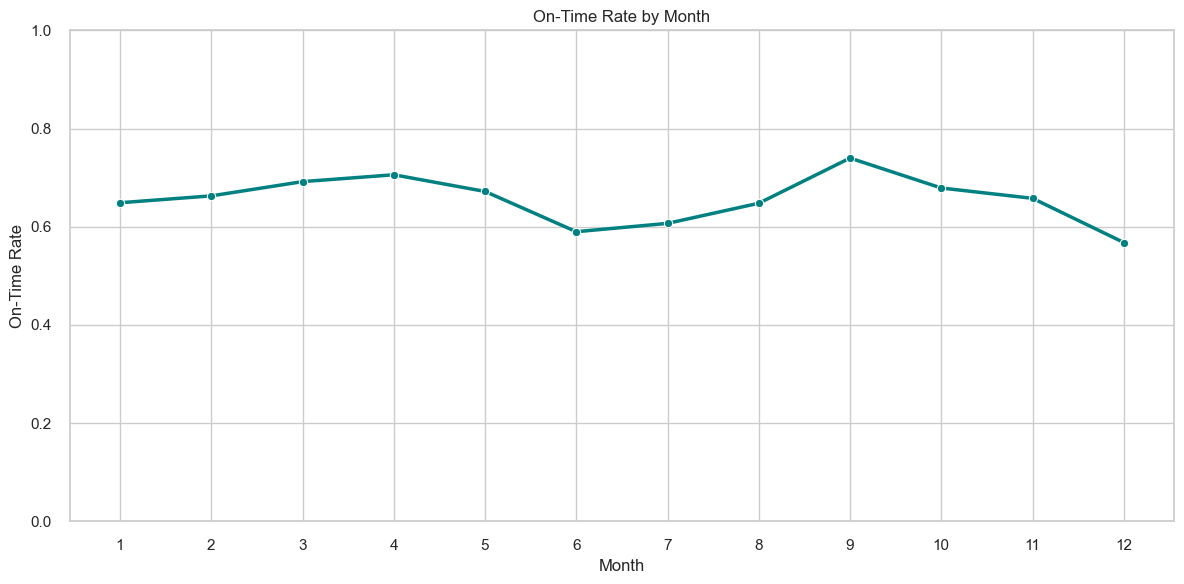

In [145]:
df_month = pd.read_csv('按月分析准点率.csv')

# plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_month, x='month', y='ontimerate', marker='o', linewidth=2.5, color='teal')
plt.title('On-Time Rate by Month')
plt.xlabel('Month')
plt.ylabel('On-Time Rate')
plt.xticks(range(1, 13))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.savefig("On-Time Rate by Month.png")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

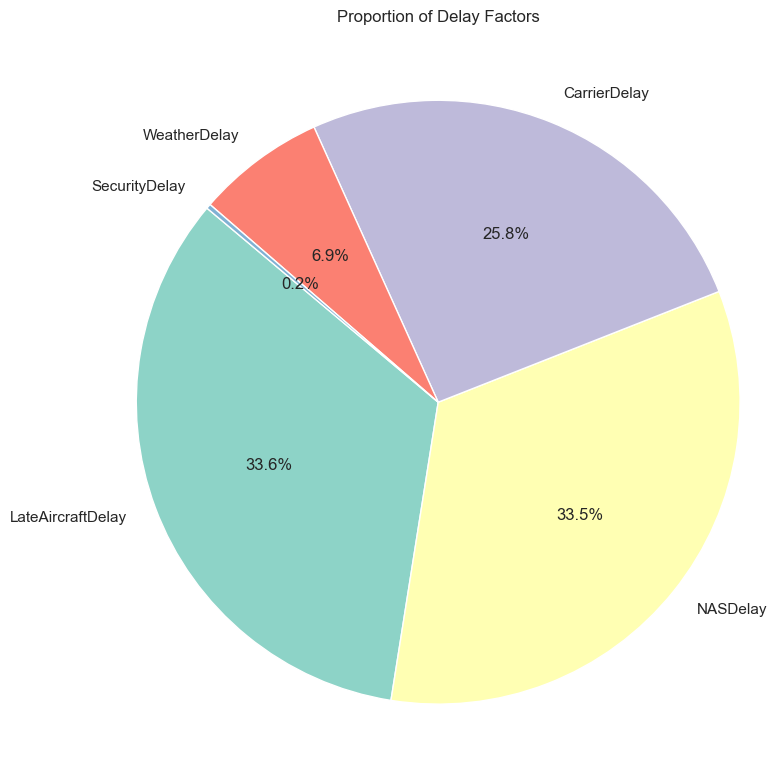

In [147]:
# load data
df = pd.read_csv('延误因素分析.csv')

# set figsize
plt.figure(figsize=(8, 8))

# pie chart
plt.pie(
    df['percentage'],
    labels=df['delaytype'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)

plt.title('Proportion of Delay Factors')
plt.axis('equal')  
plt.tight_layout()
plt.savefig("Proportion of Delay Factors.png")
plt.show

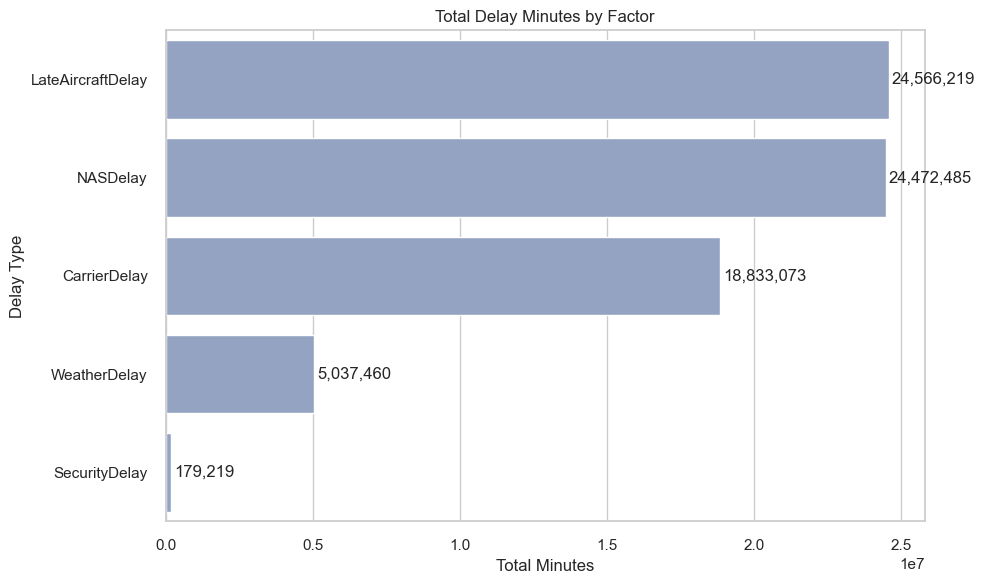

In [149]:
# set style
sns.set(style="whitegrid")

# set fig size
plt.figure(figsize=(10, 6))

# Draw a horizontal bar chart
sns.barplot(
    data=df.sort_values('totalminutes', ascending=False),
    y='delaytype',
    x='totalminutes',
    color='#8da0cb'
)

# add label
for i, row in enumerate(df.sort_values('totalminutes', ascending=False).itertuples()):
    plt.text(row.totalminutes + 1e5, i, f'{row.totalminutes:,}', va='center')

plt.title('Total Delay Minutes by Factor')
plt.xlabel('Total Minutes')
plt.ylabel('Delay Type')
plt.tight_layout()
plt.savefig("Total Delay Minutes by Factor.png")
plt.show()


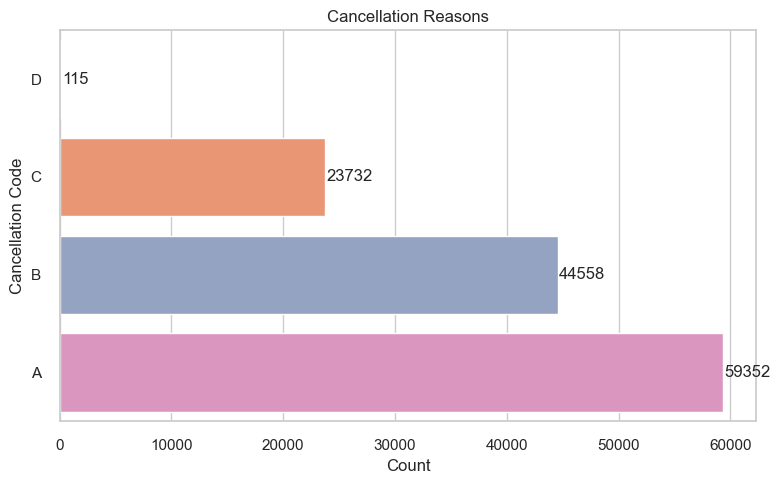

In [151]:
# set style and load data
sns.set(style='whitegrid')
df_reason = pd.read_csv('取消航班总数和取消原因分布.csv')

# plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=df_reason.sort_values('cancelcount', ascending=True),  
    x='cancelcount', 
    y='cancellationcode',
    hue='cancellationcode',  
    palette='Set2',
    dodge=False,
    legend=False  
)

# add label
for bar in ax.patches:
    ax.text(
        bar.get_width() + 100,       
        bar.get_y() + bar.get_height() / 2,
        int(bar.get_width()),
        va='center'
    )

plt.title('Cancellation Reasons')
plt.xlabel('Count')
plt.ylabel('Cancellation Code')
plt.tight_layout()
plt.savefig("Cancellation Reasons.png")
plt.show()


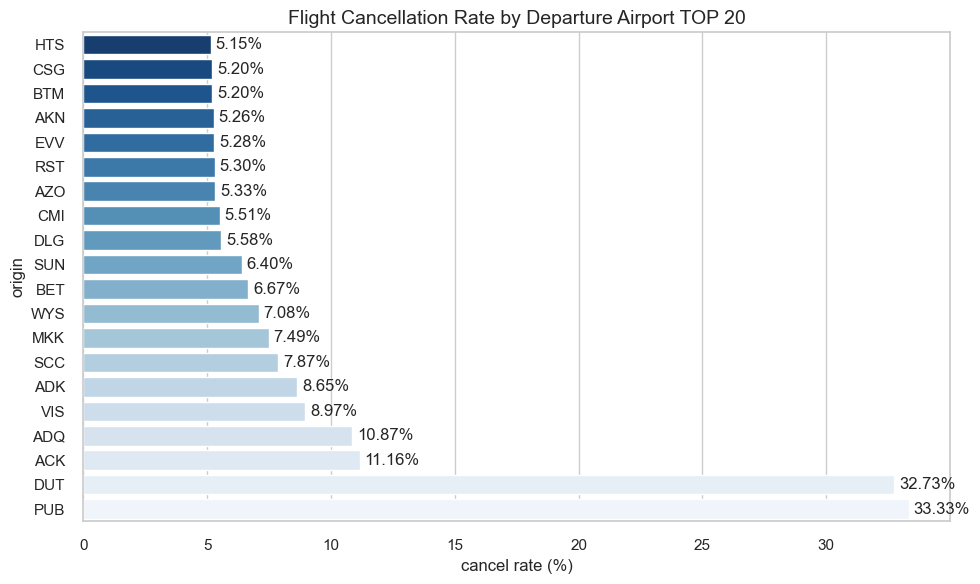

In [153]:

# load data
df_airport = pd.read_csv('按出发机场统计取消.csv')

# set style
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Draw a horizontal bar chart
ax = sns.barplot(
    data=df_airport.sort_values('cancelratepercent', ascending=True),
    x='cancelratepercent',
    y='origin',
    hue='origin',
    palette='Blues_r',
    dodge=False,
    legend=False
)

# numerical labels
for bar in ax.patches:
    ax.text(
        bar.get_width() + 0.2,
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.2f}%",
        va='center'
    )

# add tile and label
plt.title('Flight Cancellation Rate by Departure Airport TOP 20', fontsize=14)
plt.xlabel('cancel rate (%)')
plt.ylabel('origin')
plt.tight_layout()
plt.savefig("Flight Cancellation Rate by Departure Airport TOP 20.png")
plt.show()


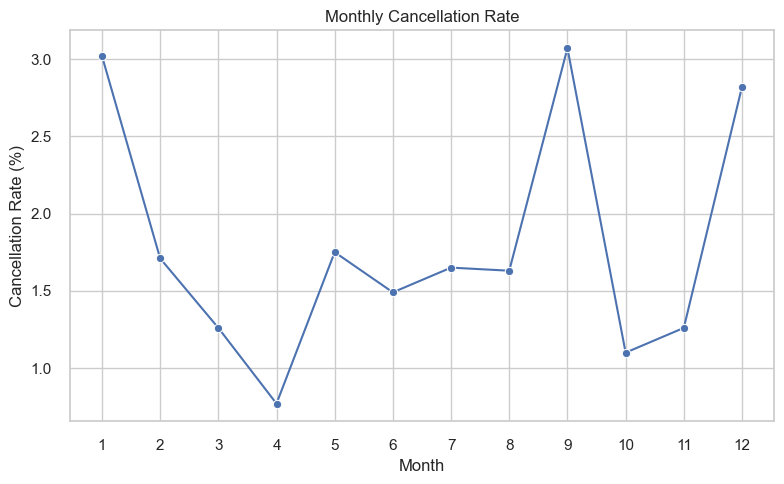

In [155]:
df_month = pd.read_csv('按月份统计取消率.csv')

plt.figure(figsize=(8, 5))
sns.lineplot(data=df_month.sort_values('month'), x='month', y='cancelratepercent', marker='o')

plt.title('Monthly Cancellation Rate')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(df_month['month'])  
plt.tight_layout()
plt.savefig("Monthly Cancellation Rate.png")
plt.show()


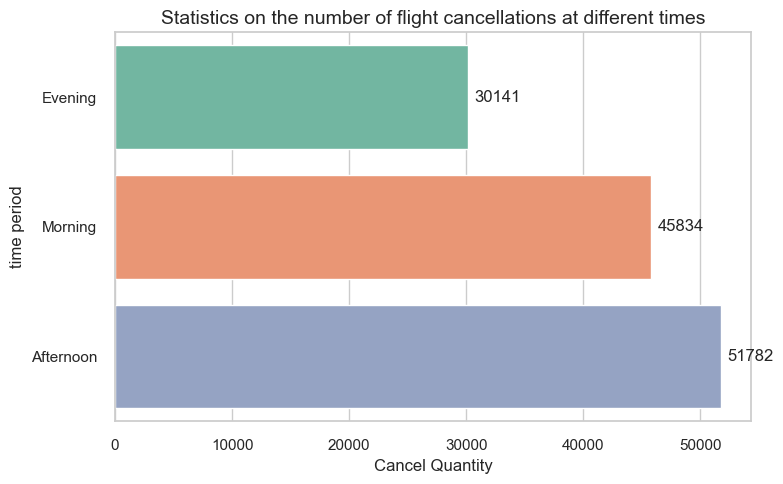

In [157]:
# load data
df_time = pd.read_csv('按时间段统计取消.csv')

sns.set(style='whitegrid')
plt.figure(figsize=(8,5))

# sort
df_time_sorted = df_time.sort_values('cancelcount', ascending=True)

ax = sns.barplot(
    data=df_time_sorted,
    y='timeofday',
    x='cancelcount',
    hue='timeofday',  
    palette='Set2',
    dodge=False,
    legend=False
)

# Add numerical labels
for bar in ax.patches:
    ax.text(
        bar.get_width() + max(df_time['cancelcount']) * 0.01, 
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())}',
        va='center'
    )

plt.title('Statistics on the number of flight cancellations at different times', fontsize=14)
plt.xlabel('Cancel Quantity')
plt.ylabel('time period')
plt.tight_layout()
plt.savefig("Statistics on the number of flight cancellations at different times.png")
plt.show()

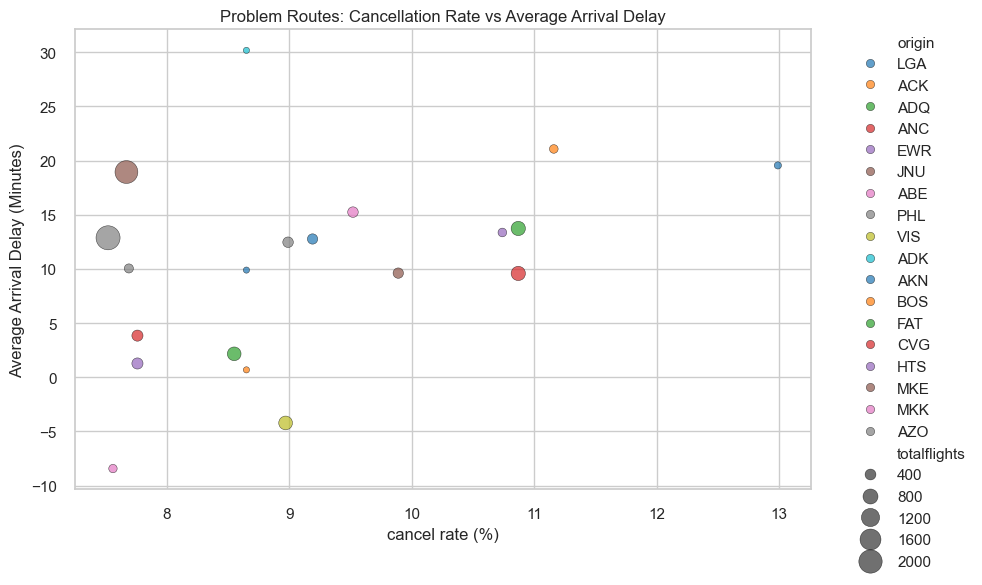

In [169]:
# load data
routes_df = pd.read_csv("取消率和延误率都高的航线（Origin-Dest）.csv")
flightnum_df = pd.read_csv("按航班号统计延误和取消率.csv")
problem_flights_df = pd.read_csv("问题最多的航班.csv")

# style
sns.set(style="whitegrid")

#Problem Route Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=routes_df,
    x="cancelratepercent",
    y="avgarrdelay",
    size="totalflights",
    hue="origin",
    palette="tab10",
    sizes=(20, 300),
    alpha=0.7,
    edgecolor="black"
)
plt.title("Problem Routes: Cancellation Rate vs Average Arrival Delay")
plt.xlabel("cancel rate (%)")
plt.ylabel("Average Arrival Delay (Minutes)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

plt.savefig("Problem Routes-Cancellation Rate vs Average Arrival Delay.png")
plt.show()

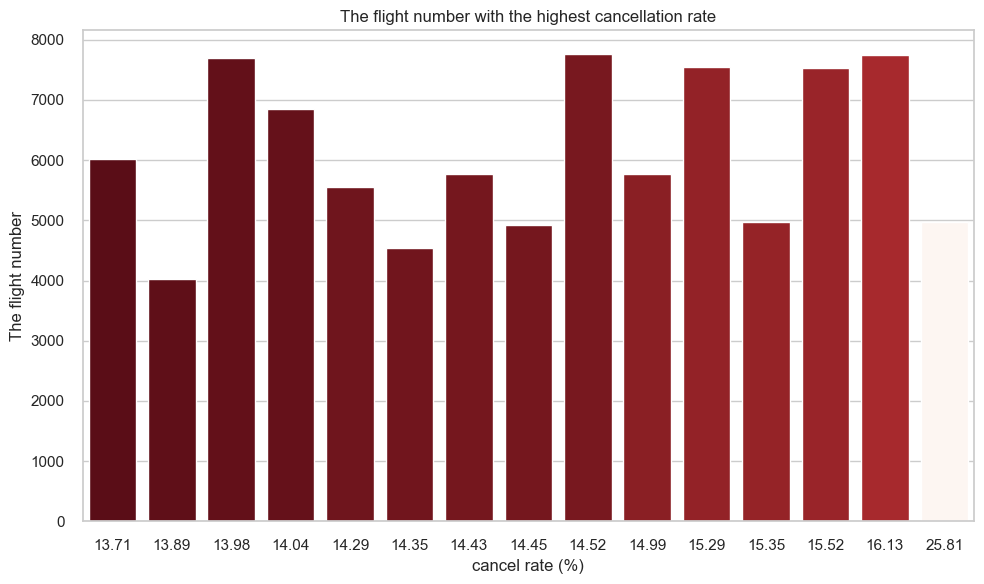

In [161]:
# Problem Flight Number Analysis
top_flightnum = flightnum_df.sort_values(by=["cancelratepercent", "avgdepdelay"], ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_flightnum,
    y="flightnum",
    x="cancelratepercent",
    hue="cancelratepercent",
    palette="Reds_r",
    legend=False
)
plt.title("The flight number with the highest cancellation rate")
plt.xlabel("cancel rate (%)")
plt.ylabel("The flight number")
plt.tight_layout()
plt.savefig("The flight number with the highest cancellation rate.png")
plt.show()

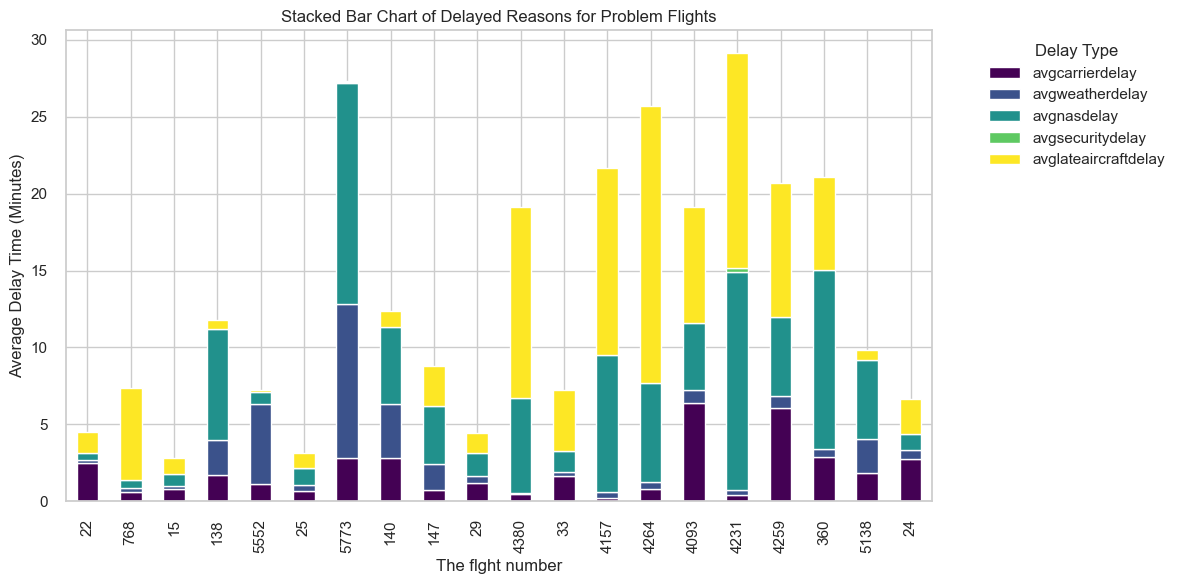

In [163]:
# Analysis of Reasons for Delayed Flights
problem_flights_df.set_index("flightnum", inplace=True)


delay_reasons = problem_flights_df[[
    "avgcarrierdelay", "avgweatherdelay", "avgnasdelay", "avgsecuritydelay", "avglateaircraftdelay"
]]


delay_reasons.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Stacked Bar Chart of Delayed Reasons for Problem Flights")
plt.xlabel("The flght number")
plt.ylabel("Average Delay Time (Minutes)")
plt.legend(title="Delay Type", bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.savefig("Stacked Bar Chart of Delayed Reasons for Problem Flights.png")
plt.show()


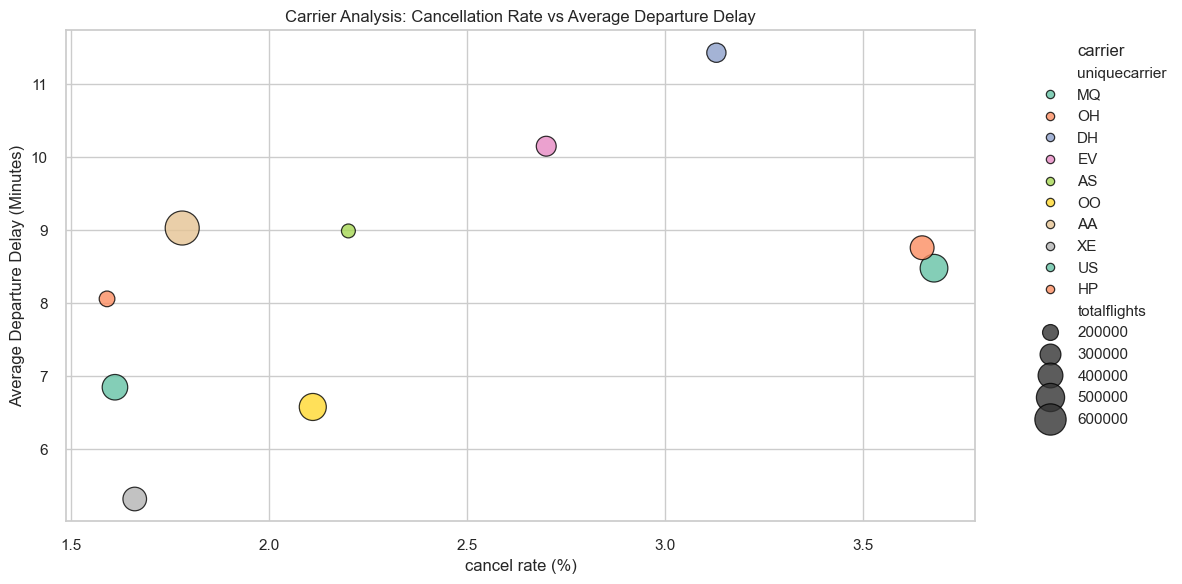

In [171]:
# Cancel rate and delay by carrier
carrier_df = pd.read_csv("按承运人（UniqueCarrier）统计平均延误和取消率.csv")

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=carrier_df,
    x="cancelratepercent",
    y="avgdepdelay",
    size="totalflights",
    hue="uniquecarrier",
    palette="Set2",
    sizes=(100, 600),
    alpha=0.8,
    edgecolor="black"
)
plt.title("Carrier Analysis: Cancellation Rate vs Average Departure Delay")
plt.xlabel("cancel rate (%)")
plt.ylabel("Average Departure Delay (Minutes)")
plt.legend(title="carrier", bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.savefig("Carrier Analysis-Cancellation Rate vs Average Departure Delay.png")
plt.show()